In [18]:
import numpy as np

In [89]:
pulse_rate = 50e6 #Hz
duty_cycle = 0.5 # hals of the pulses are used for mentainance 
g_phas_match_prob = 1/16 #global phase match prob
basis_match_prob = 1/2 #basis math prob 
signal_prob = 95/100 # 5% decoy signals
u = 0.4 # avg photon per signal pulse
L = 100 #km single arm
alpha = 0.2 #dB/Km
eta = 10**(-alpha*L/10) # link loss
eta_det = 0.98 # detector efficiency
dwdm_loss = 10**(-3/10)
phase_modulator_loss = 10**(-4/10)

#def asymp_sec_key_length(pr,L):
#    eta = 10**(-alpha*L/10)
#    return pr * duty_cycle * g_phas_match_prob *basis_match_prob*signal_prob*eta*eta_det *eta * u * np.e**-u 

#l = asymp_sec_key_length(pr=pulse_rate,L=10)

def raw_key_length(pr,L):
    eta = 10**(-alpha*L/10)
    return pr * duty_cycle * g_phas_match_prob *basis_match_prob*signal_prob*eta*eta_det *eta*dwdm_loss*phase_modulator_loss

rk = raw_key_length(pr=pulse_rate,L=L)

In [90]:
print (rk)

14.512415744031458


In [128]:
import pandas as pd

df = pd.DataFrame()

distance = np.linspace(5,400,1001)
rr_list = [1000, 500, 100, 50, 10]

for rr in reversed(rr_list):
    rkl = []
    for d in distance:
        rkl.append(raw_key_length(pr=rr*1e6,L=d/2)/1000)
    df[rr] = rkl
    

In [129]:
df

,10,50,100,500,1000
0,2.305524e+01,115.276216,230.552432,1152.762158,2305.524316
1,2.263965e+01,113.198250,226.396499,1131.982496,2263.964992
2,2.223155e+01,111.157741,222.315482,1111.577408,2223.154815
3,2.183080e+01,109.154014,218.308028,1091.540141,2183.080282
4,2.143728e+01,107.186407,214.372813,1071.864065,2143.728131
...,...,...,...,...,...
996,3.121546e-07,0.000002,0.000003,0.000016,0.000031
997,3.065277e-07,0.000002,0.000003,0.000015,0.000031
998,3.010022e-07,0.000002,0.000003,0.000015,0.000030
999,2.955764e-07,0.000001,0.000003,0.000015,0.000030


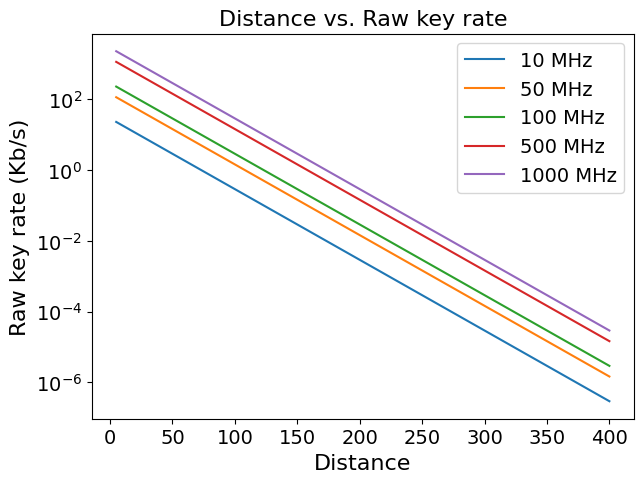

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
for rr in reversed(rr_list):
    plt.semilogy(distance,df[rr],label=str(rr)+" MHz")
#plt.plot(df["max_elev"],df["FiniteKey"]/1000, label="dfault simulation")
#plt.plot(df1["max_elev"],df1["FiniteKey"]/1000,label="additional 1dB loss")
#plt.plot(df2["max_elev"],df2["FiniteKey"]/1000,label="additional 2dB loss")
plt.xlabel("Distance",size=16)
plt.ylabel("Raw key rate (Kb/s)",size=16)
plt.title("Distance vs. Raw key rate",size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})
#plt.savefig("FiniteKey.png")
plt.show()

In [131]:

def raw_key_length_by_channel_loss(pr,lossdB):
    eta = 10**(-lossdB/10)
    return pr * duty_cycle * g_phas_match_prob *basis_match_prob*signal_prob*eta*eta_det *eta*dwdm_loss*phase_modulator_loss

In [132]:
lossdB_list = np.linspace(10,60,51)

dfdB = pd.DataFrame()
for rr in reversed(rr_list):
    rkl = []
    for loss in lossdB_list:
        rkl.append(raw_key_length_by_channel_loss(pr=rr*1e6,lossdB=loss)/1000)
    dfdB[rr] = rkl


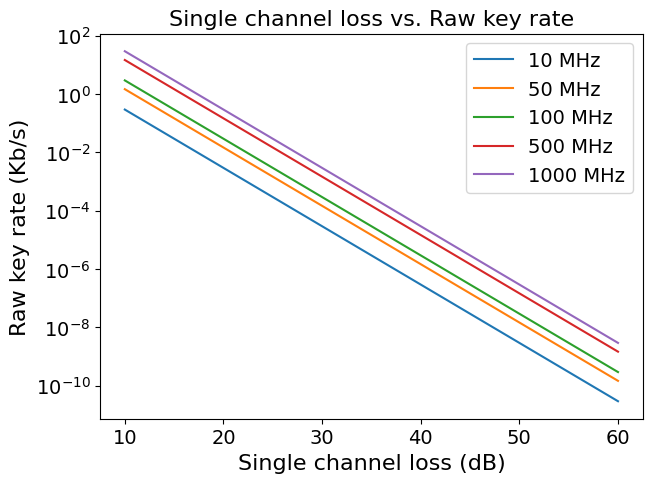

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
for rr in reversed(rr_list):
    plt.semilogy(lossdB_list,dfdB[rr],label=str(rr)+" MHz")
#plt.plot(df["max_elev"],df["FiniteKey"]/1000, label="dfault simulation")
#plt.plot(df1["max_elev"],df1["FiniteKey"]/1000,label="additional 1dB loss")
#plt.plot(df2["max_elev"],df2["FiniteKey"]/1000,label="additional 2dB loss")
plt.xlabel("Single channel loss (dB)",size=16)
plt.ylabel("Raw key rate (Kb/s)",size=16)
plt.title("Single channel loss vs. Raw key rate",size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})
#plt.savefig("FiniteKey.png")
plt.show()

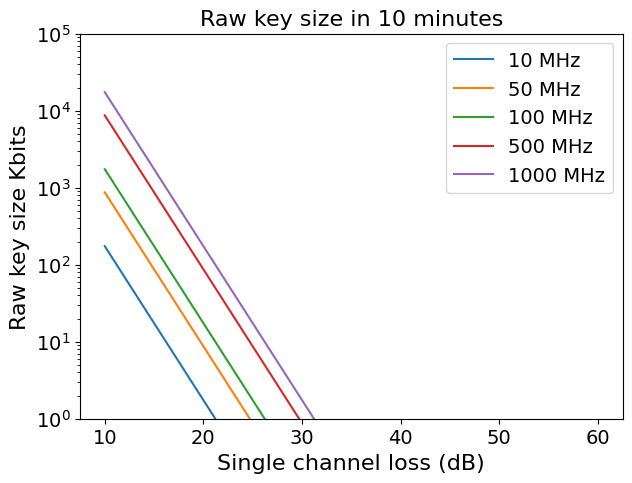

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
for rr in reversed(rr_list):
    plt.semilogy(lossdB_list,dfdB[rr]*10*60,label=str(rr)+" MHz")
#plt.plot(df["max_elev"],df["FiniteKey"]/1000, label="dfault simulation")
#plt.plot(df1["max_elev"],df1["FiniteKey"]/1000,label="additional 1dB loss")
#plt.plot(df2["max_elev"],df2["FiniteKey"]/1000,label="additional 2dB loss")
plt.xlabel("Single channel loss (dB)",size=16)
plt.ylabel("Raw key size Kbits",size=16)
plt.title("Raw key size in 10 minutes",size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})
plt.ylim((1,1e5))
#plt.savefig("FiniteKey.png")
plt.show()